In [ ]:
#"We certify that the code and data in this assignment were generated independently, 
#using only the tools and resources defined in the course and that I did not receive any external help, 
#coaching or contributions during the production of this work."

In [ ]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from google.colab import widgets
import time
from operator import add
from google.colab import widgets

In [ ]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}
  
  def __init__(self):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 20
 
  def reset(self):
    self.timestep = 0
    
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.reward_1 = 2
    self.reward_2 = 2
    self.penalty_1 = 1
    self.penalty_2 = 1   
    self.reward_1_pos = [0,2]
    self.reward_2_pos = [2,2]
    self.penalty_1_pos = [3,1]
    self.penalty_2_pos = [0,3]
    self.total_reward = 0
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5  
    observation = self.state.flatten()
    return observation
  def step(self, action):
    reward= 0
    
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1

    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.state = np.zeros((4,4))
    self.state[tuple(self.goal_pos)] = 0.5
    self.state[tuple(self.agent_pos)] = 1
    observation = self.state.flatten()

    if (self.agent_pos == self.goal_pos).all():
      reward = 10
    elif (self.agent_pos == self.reward_1_pos).all():
      reward = 7
    elif (self.agent_pos == self.reward_2_pos).all():
      reward = 8
    elif (self.agent_pos == self.penalty_1_pos).all():
      reward = -7
    elif (self.agent_pos == self.penalty_2_pos).all():
      reward = -8

        
    self.total_reward= self.total_reward + reward
    self.timestep += 1

    done = True if self.timestep >= self.max_timesteps or (self.agent_pos == self.goal_pos).all() else False

    info = {}
    return observation, reward, done, info
    
  def render(self):
    plt.imshow(self.state)

In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{}


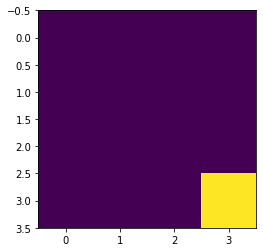

<IPython.core.display.Javascript object>

In [ ]:
env = GridEnvironment()
done = False
agent = RandomAgent(env)
obs = env.reset()
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
    print(info)        
  time.sleep(1)
  

# PART 2

## Implementation of SARSA

In [ ]:
#Implementation of SARSA
class SARSA:
#Intializing env and agent
    def __init__(self,env,agent):
        self.values_estm = []
        self.values_rew = []
        self.env = env
        self.agent = agent
        self.observation_space = env.observation_space
        self.action_space = env.action_space
        self.Q_table = np.zeros((self.observation_space.n,self.action_space.n))
# Training the algorithm for following parameters    
    def model(self,al,gm,epsd,decay):
        var_est = 1
        time_step = []
        my_episode = np.arange(epsd) # evenly spaced episodes
        for instn_epi in my_episode:
            max_ts = 0
            end_epsd = False
            obs = self.env.reset()
            self.values_estm.append(var_est)
            num_step=0
            tot_reward=0
            max_ts += 1
            time_step.append(max_ts)
            rew = 0
            while not end_epsd:
                cur_agent = int(np.where(obs==1)[rew][rew])
                randp = np.random.uniform(0,1)
                if randp < var_est:
                  action1= int(self.agent.step(obs))
                else:
                  action1= int(np.argmax(self.Q_table, axis=1)[cur_agent])
                obs, reward, done, info = self.env.step(action1)
                tot_reward += reward
                nxt_agent = int(np.where(obs==1)[rew][rew])
                if done!=True:
                  randp = np.random.uniform(0,1)
                  if var_est > randp:
                    action2= self.agent.step(obs)
                    action2=int(action2)
                  else:
                    action2= np.argmax(self.Q_table, axis=1)[nxt_agent]
                    action2=int(action2)
                  self.Q_table[cur_agent][action1] = self.Q_table[cur_agent][action1] + al*((reward+gm*self.Q_table[nxt_agent][action2])-(self.Q_table[cur_agent][action1]))
                  num_step+=1
                else:
                  self.Q_table[cur_agent][action1] = self.Q_table[cur_agent][action1] + al*((reward)-(self.Q_table[cur_agent][action1]))
                  num_step+=1
                end_epsd = done
            self.values_rew.append(tot_reward)
            var_est = var_est * decay

            if var_est <= 0.01:
                break

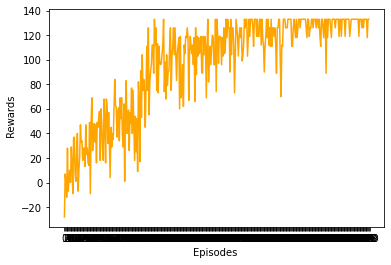

In [ ]:
env = GridEnvironment()
agent = RandomAgent(env)
sarsa_obs = SARSA(env,agent)
sarsa_obs.model(0.2,0.8,400,0.990)
plt.ylabel(' Rewards')
plt.xlabel('Episodes ') 
plt.plot(sarsa_obs.values_rew,color='orange') 
plt.xticks(range(0,len(sarsa_obs.values_rew)+1, 1)) 
plt.show()

### Epsilon decay

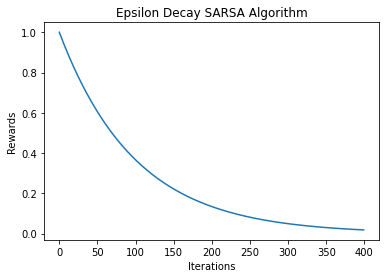

In [ ]:
plt.plot(sarsa_obs.values_estm,mfc='pink') 
plt.ylabel('Rewards')
plt.xlabel('Iterations') 
plt.title("Epsilon Decay SARSA Algorithm") 
plt.show()

### Total Rewards per episode

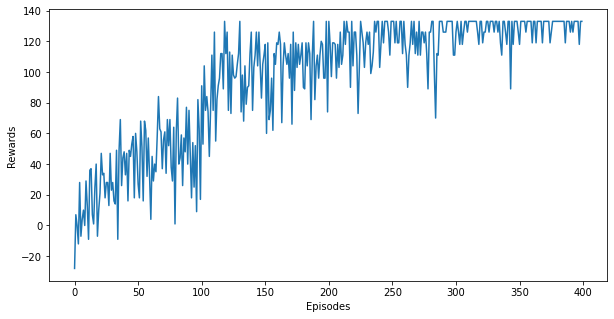

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.plot(sarsa_obs.values_rew)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: -8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: -8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: -8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: -8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: -8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

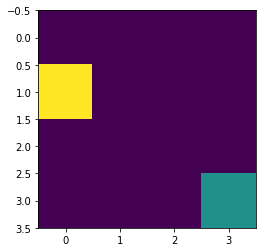

<IPython.core.display.Javascript object>

Reward: 0


In [ ]:
Qtable = np.zeros((4,4,env.action_space.n))
env = GridEnvironment()
obs = env.reset()
done = False
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not done:
  if np.random.uniform(0,1) < 0.9:
    action = np.random.choice(env.action_space.n)
  else:
    action = np.argmax(Qtable[obs[0],obs[1]])
  obs, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  print("Reward:",reward)
  time.sleep(1)

### 20 episodes with greedy policy-




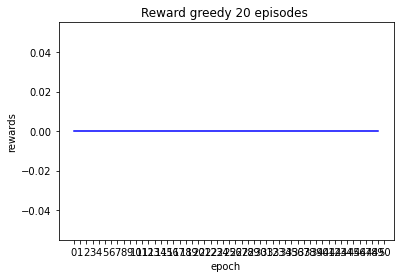

In [ ]:
rew_epsd=[]
for i in np.linspace(1,20):
  sarsa_obsrv = sarsa_obs.env.reset()
  itr_done= True
  tot_rew =+ 0
  while itr_done:
    player_current=int(np.where(sarsa_obsrv==1)[0][0])
    activity1= int(np.argmax(sarsa_obs.Q_table, axis=1)[player_current])
    observ, reward, done, info = sarsa_obs.env.step(action)
    tot_rew +=reward
    sarsa_obsrv = observ
    itr_done= done
  rew_epsd.append(tot_rew) 
plt.plot(rew_epsd,color='blue') 
plt.xticks(range(0,len(rew_epsd)+1, 1)) 
plt.ylabel('rewards')
plt.xlabel('epoch') 
plt.title("Reward greedy 20 episodes ") 
plt.show()

### Tuning Hyperparameters

Episode 400 and decay = 0.990

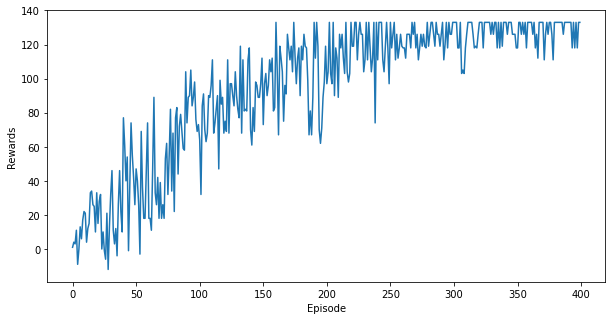

In [ ]:
env2 = GridEnvironment()
player2 = RandomAgent(env2)
sarsa_obs2 = SARSA(env2,player2)
sarsa_obs2.model(0.2,0.8,400,0.990)
plt.figure(figsize=(10,5))
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.plot(sarsa_obs2.values_rew)

Episode 400 and decay = 0.985

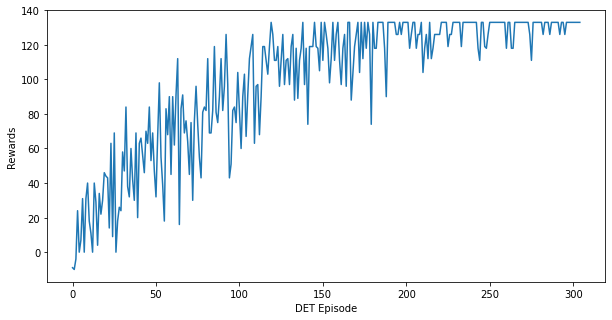

In [ ]:
env2 = GridEnvironment()
player2 = RandomAgent(env2)
sarsa_obs2 = SARSA(env2,player2)
sarsa_obs2.model(0.2,0.8,400,0.985)
plt.figure(figsize=(10,5))
plt.xlabel('DET Episode')
plt.ylabel('Rewards')
plt.plot(sarsa_obs2.values_rew)

Episode 400 and decay = 0.980

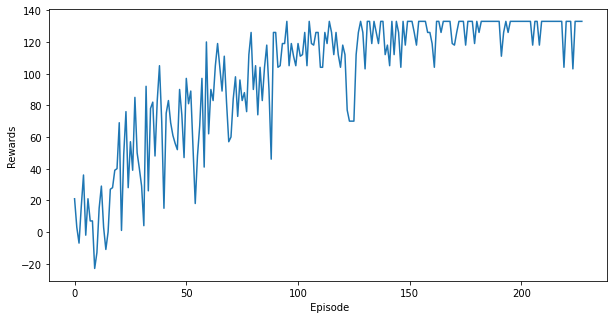

In [ ]:
env3 = GridEnvironment()
player3 = RandomAgent(env3)
sarsa_obs3 = SARSA(env3,player3)
sarsa_obs3.model(0.2,0.8,400,0.980)
plt.figure(figsize=(10,5))
plt.xlabel(' Episode')
plt.ylabel('Rewards')
plt.plot(sarsa_obs3.values_rew)

For decay rate 0.980 we got better results , hence we will keep decay rate - 0.980 and will modify 2nd hyperparameter , i.e. episodes

Episode = 300

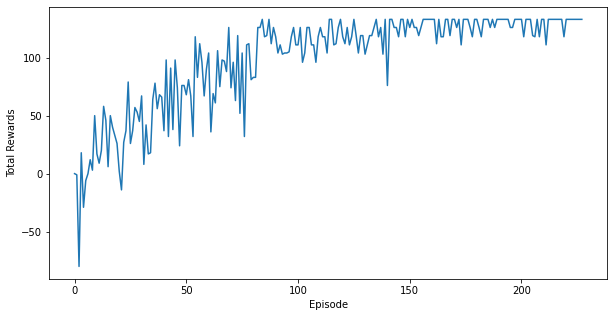

In [ ]:
env3 = GridEnvironment()
player3 = RandomAgent(env3)
sarsa_obs3 = SARSA(env3,player3)
sarsa_obs3.model(0.2,0.8,300,0.980)
plt.figure(figsize=(10,5))
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.plot(sarsa_obs3.values_rew)

Episode = 200

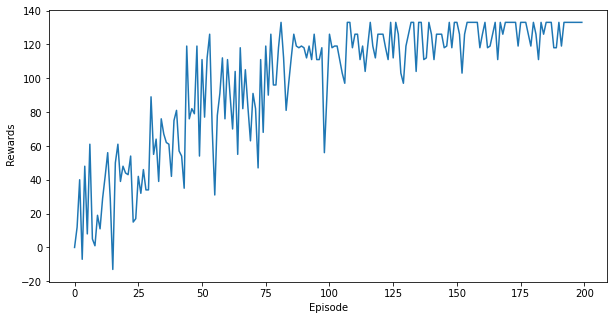

In [ ]:
env3 = GridEnvironment()
player3 = RandomAgent(env3)
sarsa_obs3 = SARSA(env3,player3)
sarsa_obs3.model(0.2,0.8,200,0.980)
plt.figure(figsize=(10,5))
plt.xlabel('Episode')
plt.ylabel(' Rewards')
plt.plot(sarsa_obs3.values_rew)

Episode = 100

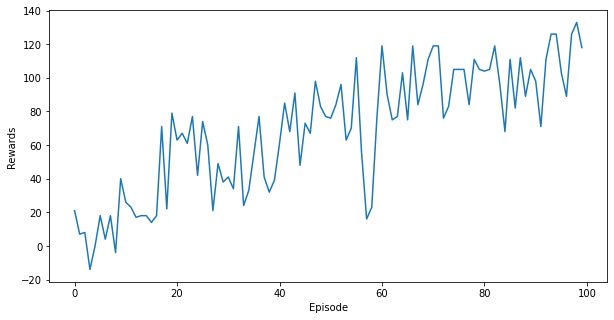

In [ ]:
env3 = GridEnvironment()
player3 = RandomAgent(env3)
sarsa_obs3 = SARSA(env3,player3)
sarsa_obs3.model(0.2,0.8,100,0.980)
plt.figure(figsize=(10,5))
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.plot(sarsa_obs3.values_rew)

Comparison between Q learning and SARSA algorithm

In [ ]:
def smooth_graph(param):
  return [np.mean(param[i:i+1]) for i in range(1, len(param))]
Q_learn = smooth_graph(sarsa_obs2.values_rew)
S_learn = smooth_graph(sarsa_obs2.values_estm)

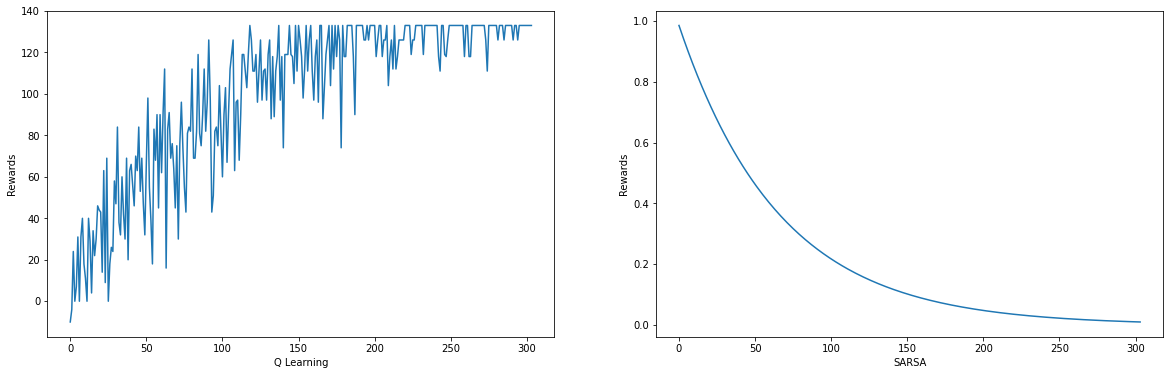

In [ ]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
plt.xlabel('Q Learning')
plt.ylabel('Rewards')
ax2 = fig.add_subplot(122)
plt.xlabel('SARSA')
plt.ylabel('Rewards')
ax.plot(Q_learn)
ax2.plot(S_learn)
plt.show()

References

REFERENCES:
1.Geeks for geeks for graphs
2. https://www.geeksforgeeks.org/sarsa-reinforcement-learning/
3. https://en.wikipedia.org/wiki/State%E2%80%93action%E2%80%93reward%E2%80%93state%E2%80%93actio
4. https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56
5. https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-q-learning
6. Instructor’s notes/slides/references codes
